In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [54]:
medical = pd.read_csv("proje.csv")
df = medical.copy()
print("Verinin ilk yedi satırı:\n",df.head(7))
print(df.isna().sum())#NaN sayısı
df.info()#Sütun değikenlerinin bilgileri

Verinin ilk yedi satırı:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker

In [55]:
#SMOKER'ı kategorik sınıf haline getirme
df['smoker'] = df['smoker'].astype('category')
print(df['smoker'])

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: category
Categories (2, object): ['no', 'yes']


In [56]:
#Age sütunundaki benzersiz veri
value = df['age'].value_counts()
print(value)

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


In [57]:
#Smoker sütunundaki benzersiz veri
value = df['smoker'].value_counts()
print(value)

no     1064
yes     274
Name: smoker, dtype: int64


In [58]:
#Region sütunundaki benzersiz veri
value =df['region'].value_counts()
print(value)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


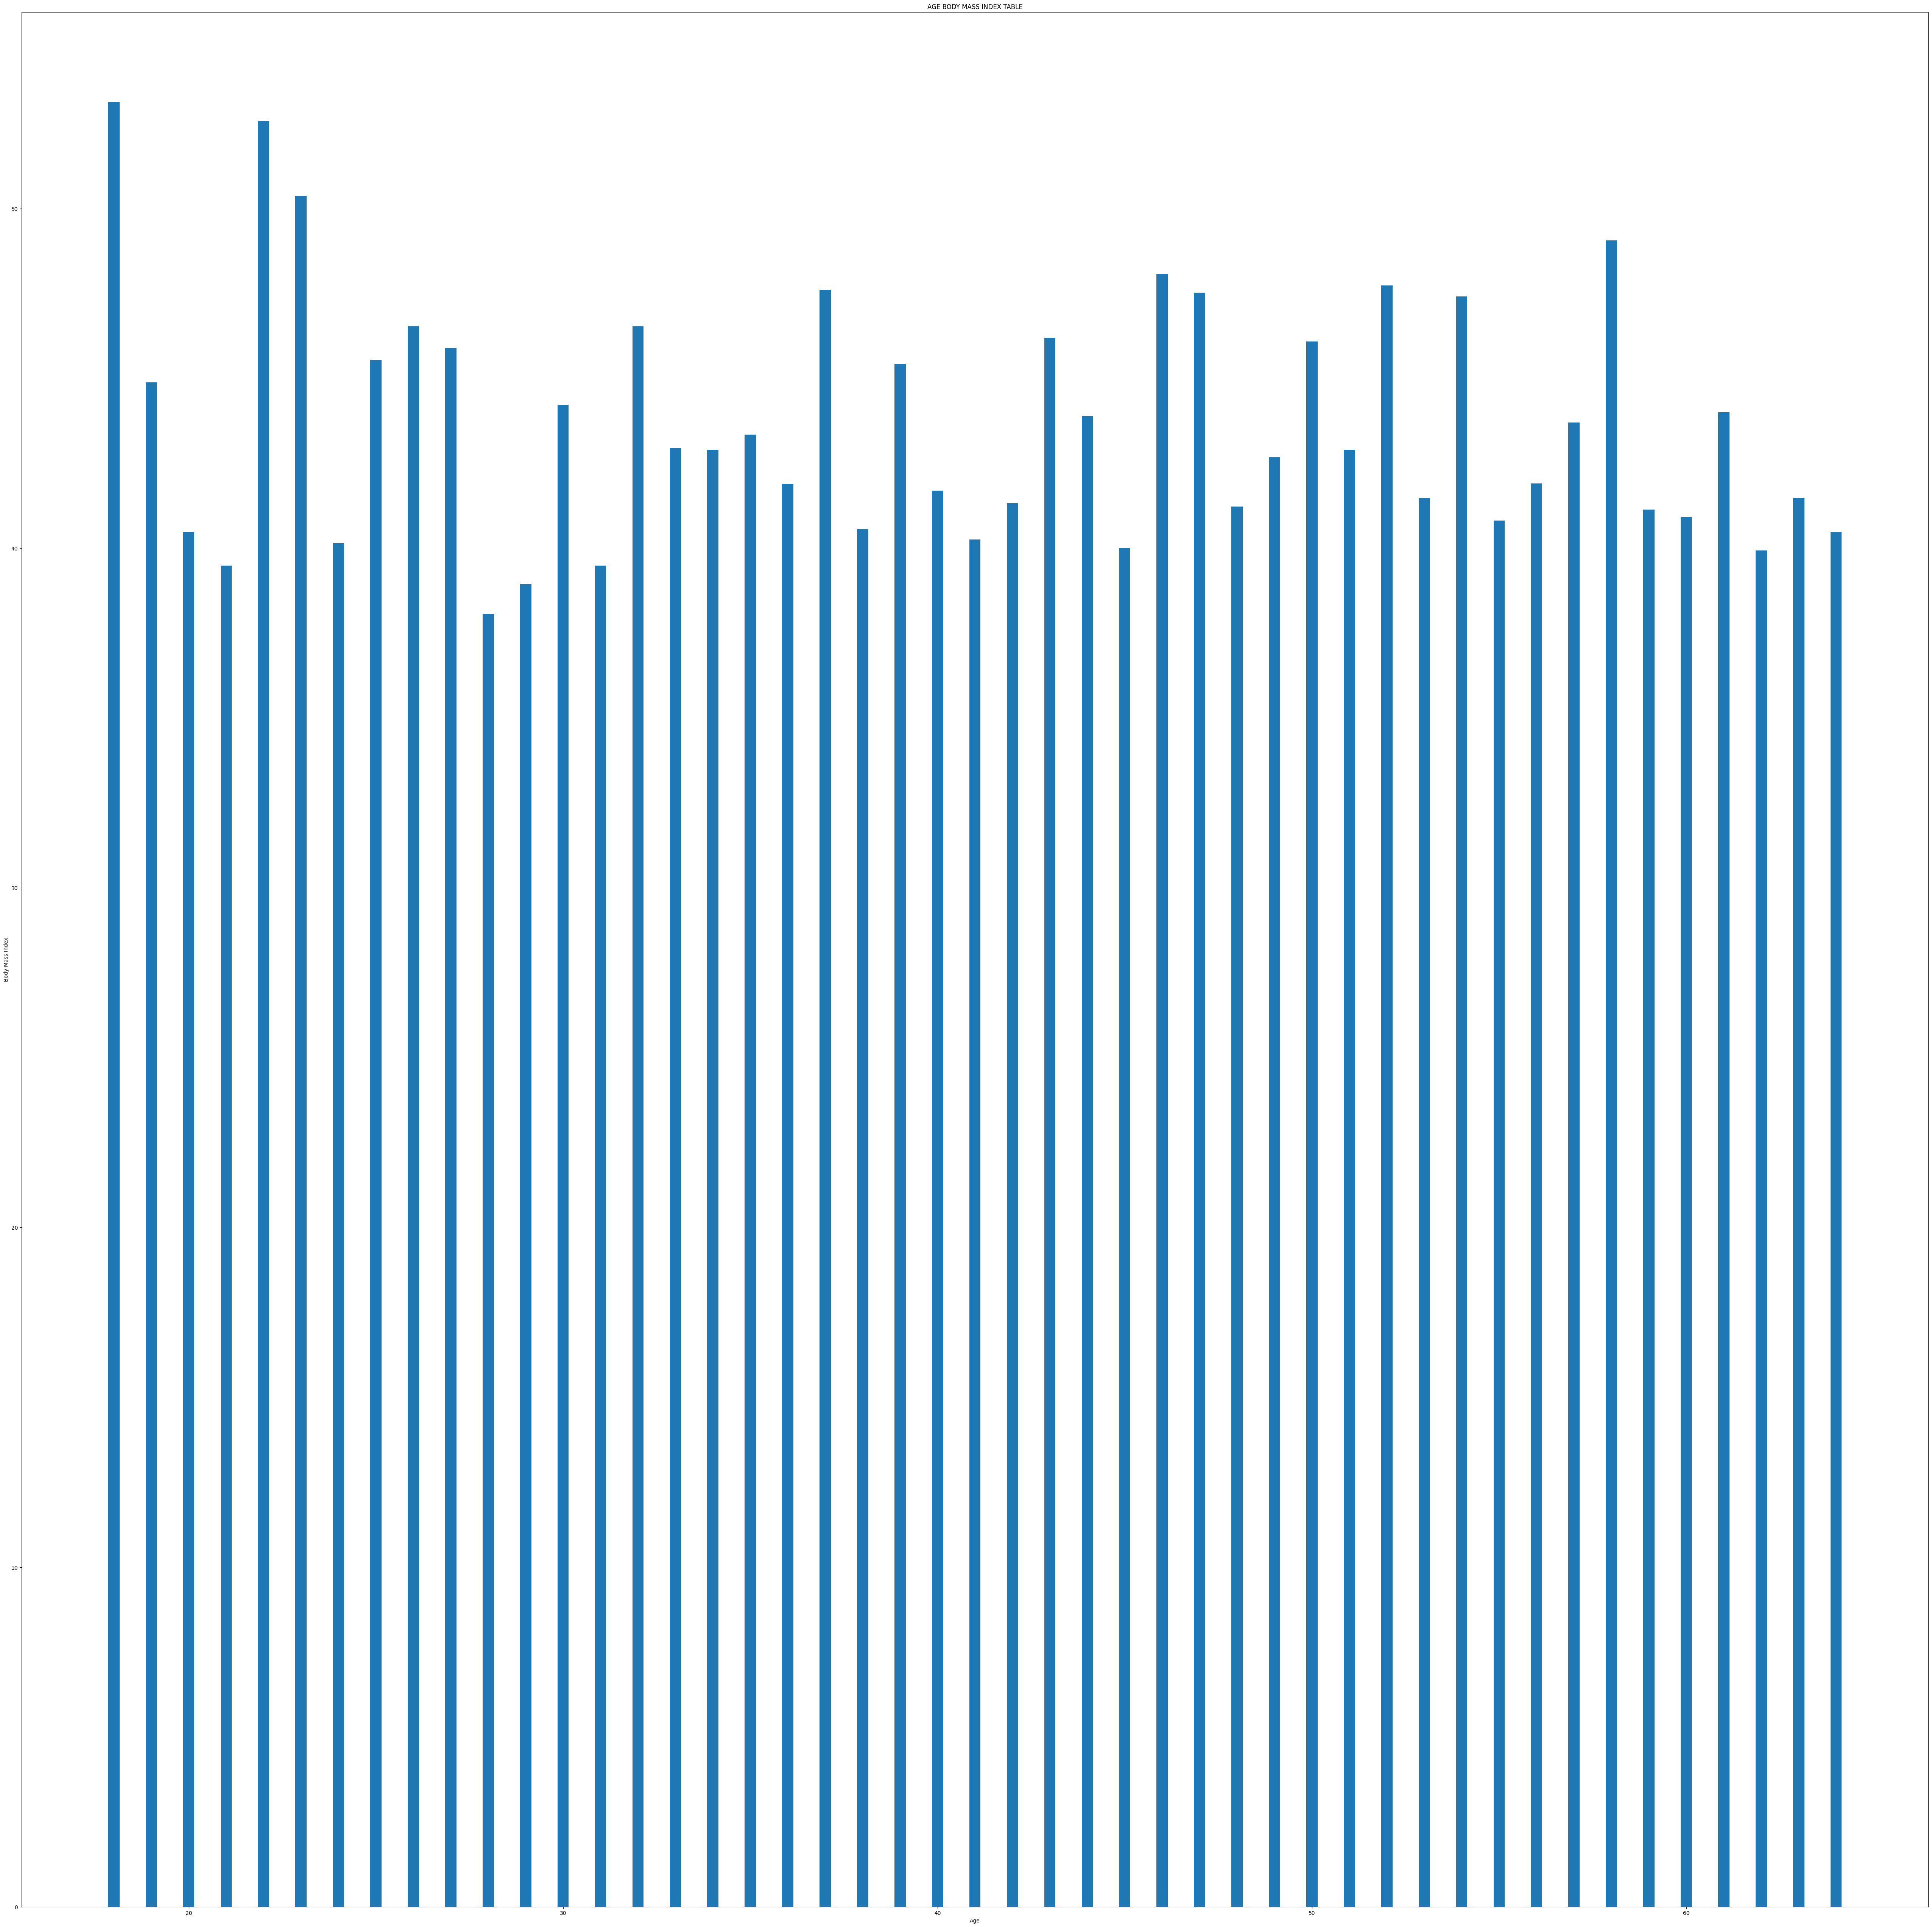

In [59]:
#AGE ve BMİ arasındaki ilişki
fig = plt.figure(figsize=(65,65))
plt.bar(df['age'],df['bmi'],width=0.3)
plt.xlabel("Age")
plt.ylabel("Body Mass Index")
plt.title("AGE BODY MASS INDEX TABLE")
plt.show()

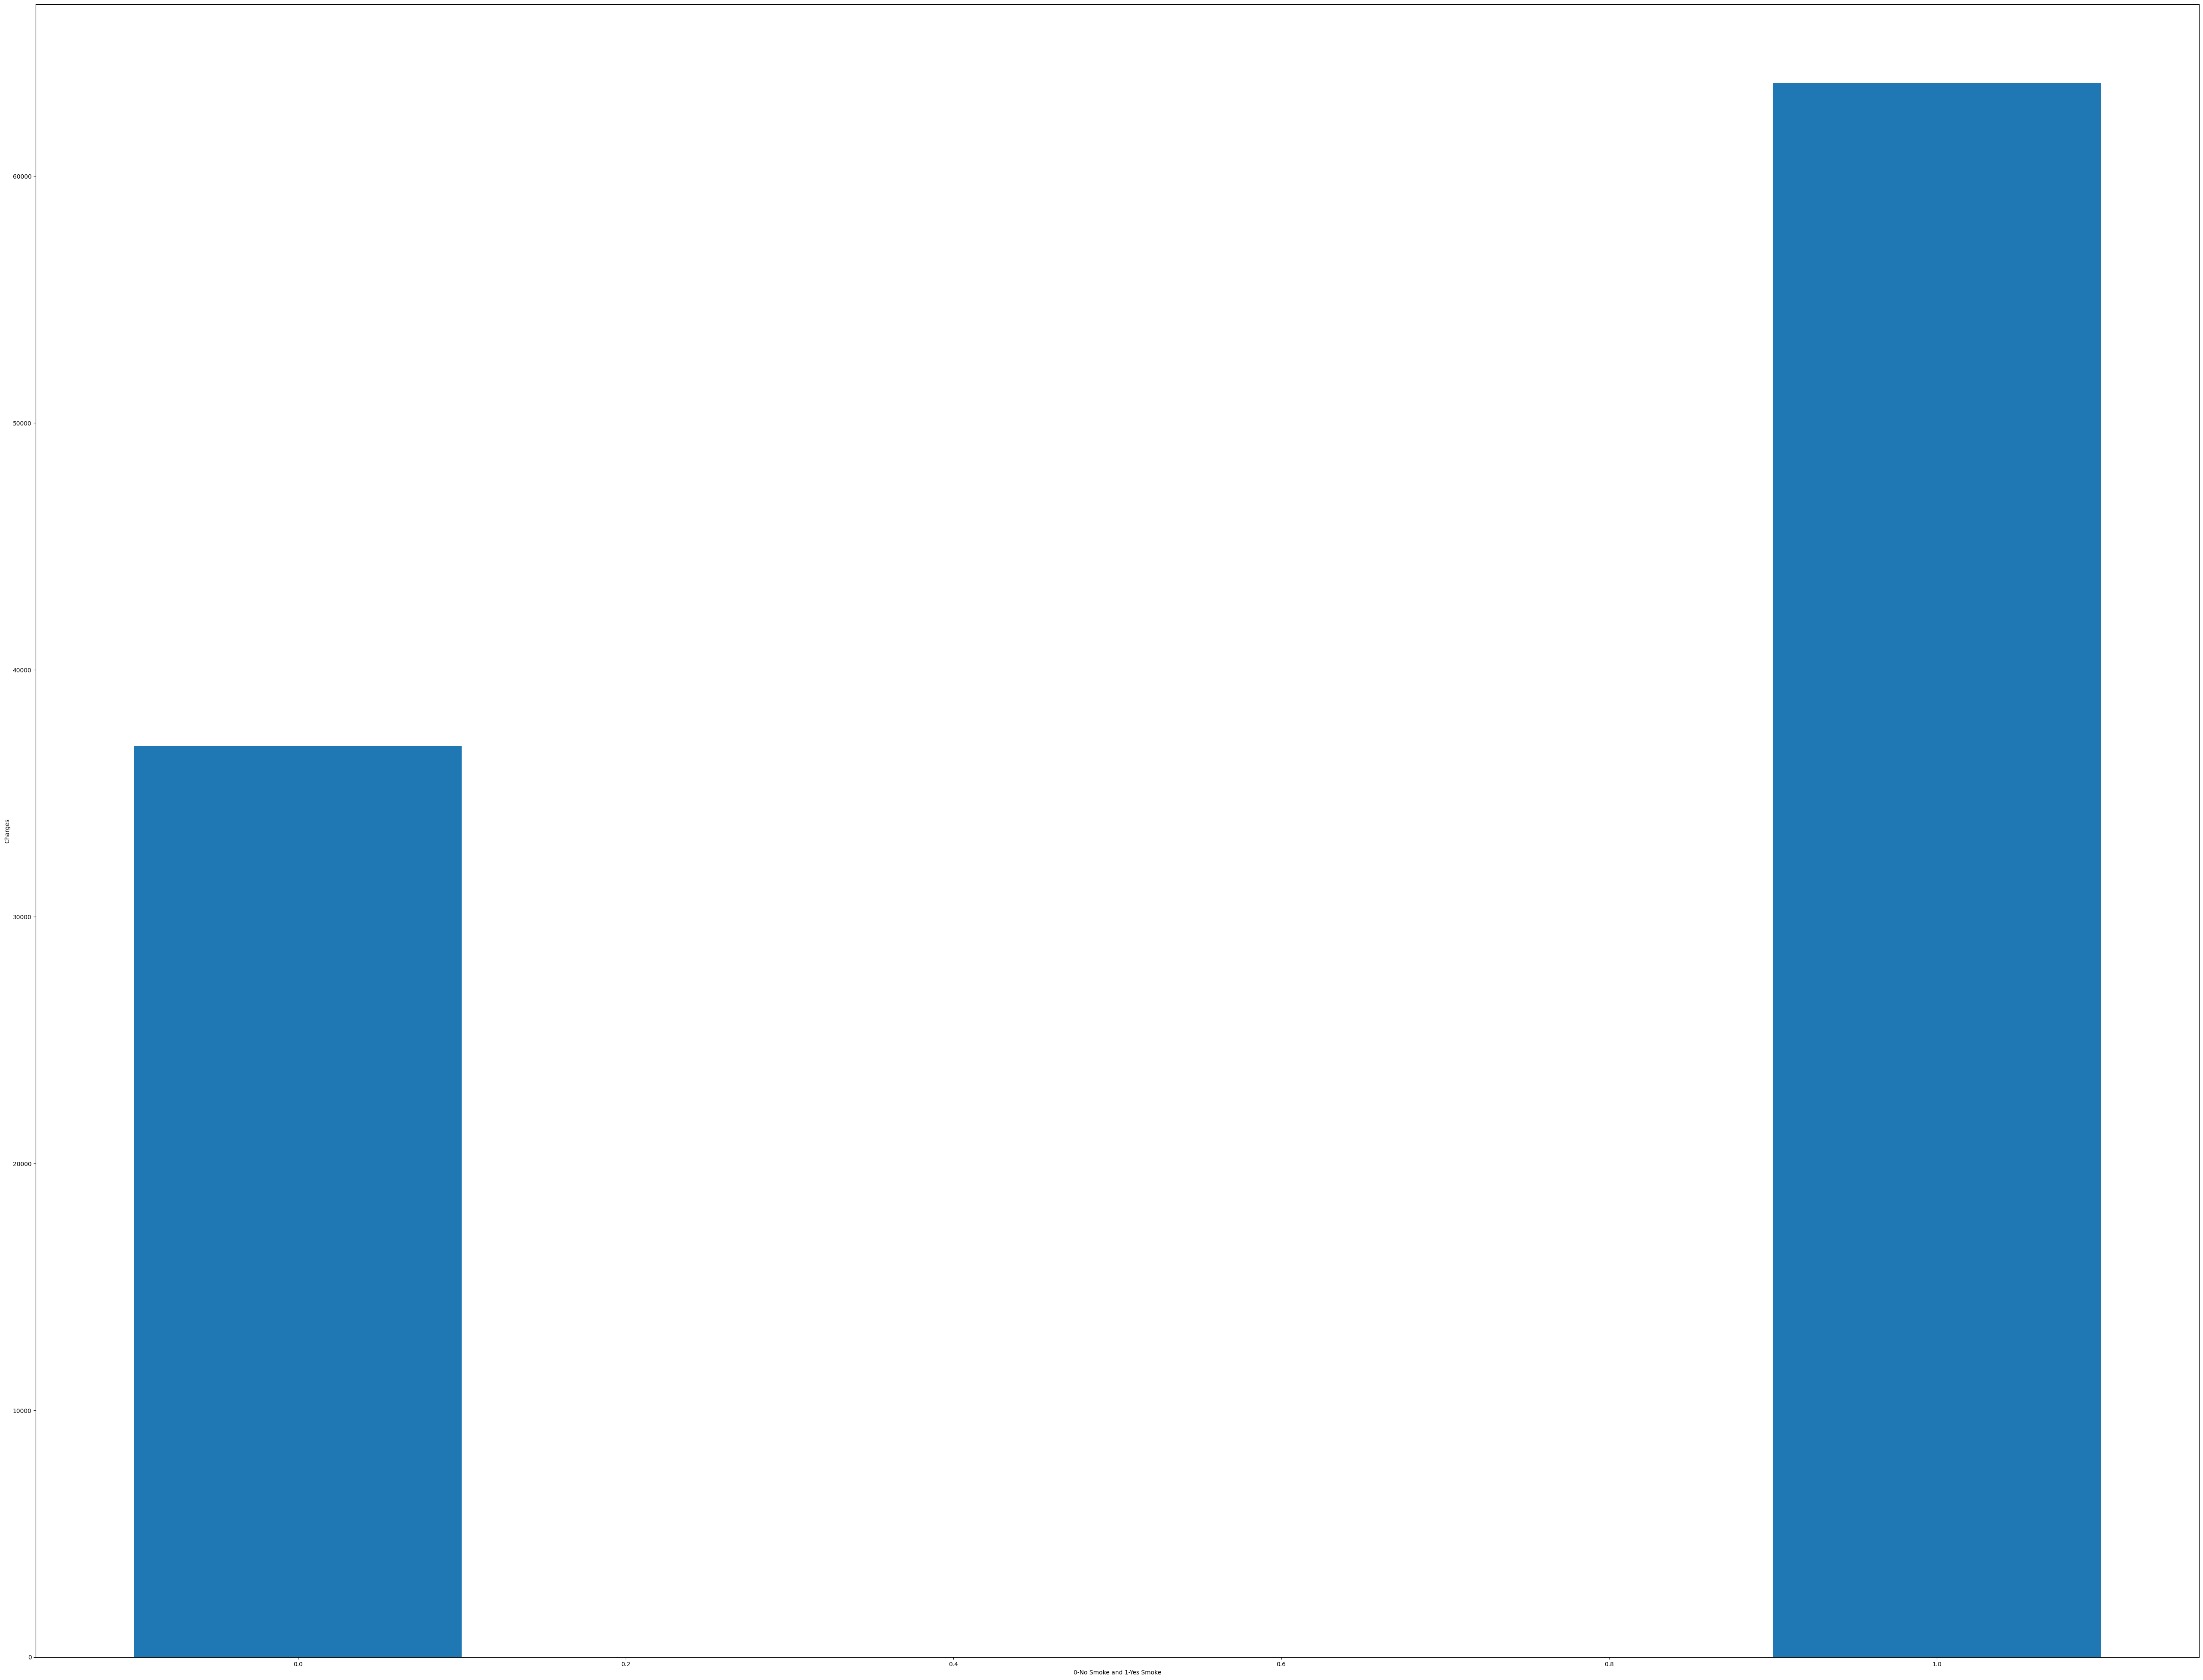

In [60]:
#SMOKER ve CHARGES arasındaki ilişki
smoke = df['smoker']
list=[]
for x in range(1338):
    if smoke[x] == "yes":
        list.append(1)
    else:
        list.append(0)

fig2 = plt.figure(figsize=(65,50))
plt.bar(list,df['charges'],width=0.2)
plt.xlabel("0-No Smoke and 1-Yes Smoke")
plt.ylabel("Charges")
plt.show()

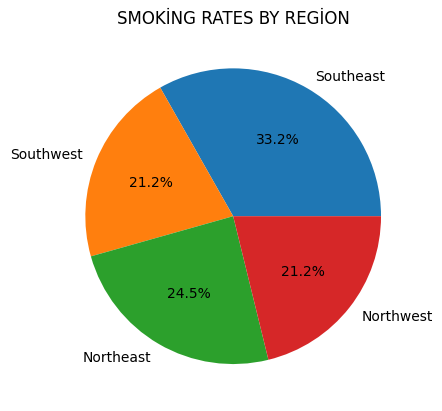

In [61]:
#REGİON ve SMOKER arasındaki ilişki
set = pd.DataFrame([list,df['region']],['Smoker','Region'])

northeast = 0
southeast = 0
northwest = 0
southwest = 0

for x in range(1338):
    value_index = set.iat[0, x]
    value_index2 = set.iat[1, x]
    if value_index2 == 'southwest':
        southwest = value_index + southwest
    elif value_index2 == 'northwest':
        northwest = value_index + northwest
    elif value_index2 == 'northeast':
        northeast = value_index + northeast
    else:
        southeast = value_index + southeast

array = np.array([southeast,southwest,northeast,northwest])

plt.pie(array,labels=['Southeast','Southwest','Northeast','Northwest'],autopct='%1.1f%%')
plt.title('SMOKİNG RATES BY REGİON')
plt.show()

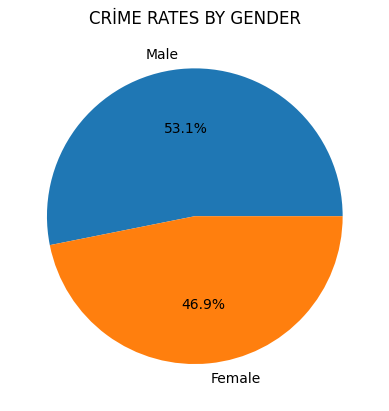

In [62]:
#SEX ve CHARGES arasındaki ilişki
dt = pd.Series(df['sex'])
dt2 = pd.Series(df['charges'])

dict_1 = {'sex':dt,'charges':dt2}

pandas = pd.DataFrame(dict_1)

m_charges = 0
f_charges = 0

for x in range(1338):
    value_index = pandas.iat[x, 0]
    value_index2 = pandas.iat[x, 1]
    if value_index == 'male':
        m_charges = value_index2 + m_charges
    else:
        f_charges = value_index2 + f_charges

label = ['Male','Female']
charges = np.array([m_charges,f_charges])

plt.pie(charges,labels=label,autopct='%1.1f%%')
plt.title('CRİME RATES BY GENDER')
plt.show()

In [63]:
#One-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex','region','smoker'], drop_first=True)

In [64]:
#Veri setini Train ve Test veri setlerine ayırma
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [65]:
#Veri setlerinin boyutları
print("Eğitim veri seti boyutu:", X_train.shape, y_train.shape)
print("Test veri seti boyutu:", X_test.shape, y_test.shape)

Eğitim veri seti boyutu: (1070, 8) (1070,)
Test veri seti boyutu: (268, 8) (268,)


In [66]:
#Modeli oluşturma ve eğitme
model = RandomForestRegressor(n_estimators=120,random_state=40)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=120, random_state=40)

In [67]:
#Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_test)

In [68]:
#Test verisini liste objsine dönüştürme
y_testL = y_test.tolist()
print(y_testL)

[21348.706, 39774.2763, 9850.432, 9800.8882, 2639.0429, 11093.6229, 23244.7902, 11362.755, 8280.6227, 2156.7518, 13228.84695, 39725.51805, 10065.413, 3481.868, 11253.421, 4646.759, 12890.05765, 9957.7216, 30259.99556, 13616.3586, 16796.41194, 3757.8448, 8342.90875, 6435.6237, 8059.6791, 10197.7722, 39836.519, 34779.615, 14349.8544, 3353.4703, 9504.3103, 2473.3341, 6571.544, 7144.86265, 7209.4918, 3277.161, 10560.4917, 12129.61415, 12949.1554, 27037.9141, 11381.3254, 39611.7577, 28868.6639, 15820.699, 24603.04837, 13393.756, 7162.0122, 7804.1605, 10601.63225, 8932.084, 13352.0998, 9583.8933, 6356.2707, 2055.3249, 38245.59327, 12269.68865, 1631.6683, 9386.1613, 46113.511, 13937.6665, 5836.5204, 36124.5737, 11082.5772, 7243.8136, 22395.74424, 52590.82939, 3537.703, 47305.305, 13430.265, 2362.22905, 34472.841, 8269.044, 36580.28216, 8823.279, 2899.48935, 8825.086, 21082.16, 40974.1649, 3597.596, 17178.6824, 1628.4709, 4234.927, 6986.697, 11482.63485, 20709.02034, 5253.524, 6338.0756, 18157

In [69]:
#Tahmin verisini liste objesine dönüştürme
y_pred = pd.Series(y_pred)
y_pred = y_pred.tolist()
print(y_pred)

[23695.628606416652, 39803.86416241667, 11625.88602175, 10482.357835249999, 4964.193690999997, 16245.938418583342, 24098.16478641665, 11616.833506666679, 8785.452630666676, 4940.198282483334, 13295.40087124999, 45290.7540158333, 10775.906475750002, 6310.98904608333, 11513.496658583337, 13714.999491333358, 1630.6383316666668, 10437.133768583326, 12540.80385874998, 13958.362120166665, 5244.456036666666, 3782.007231666671, 8467.942209583318, 8780.935748000013, 7824.149927166673, 10256.802479500002, 39961.77468358337, 35360.61342633336, 15844.887217833319, 3765.8433013333297, 10683.833796083327, 3594.733000333331, 7315.5966520833435, 6922.398443166671, 7639.9471568333365, 5021.247005000001, 12588.64348591667, 12237.665939583343, 13436.504976666653, 27251.043979000042, 17993.235291416673, 39722.82256533332, 28751.350585000004, 18376.42095625, 7756.410120749994, 13677.596438333334, 8188.86725983334, 9367.390556583332, 13306.950954999998, 14289.350971000005, 13830.379550833333, 10708.16872233

In [70]:
#MSE ve MAE hata değerlerini hesaplama
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_testL, y_pred)

print("Mean Squared Error:", mse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_testL, y_pred)

print("Mean Absolute Error:", mae)

Mean Squared Error: 31468360.99615292
Mean Absolute Error: 2923.3850562323873
